In [100]:
# LOOKER DASHBOARD LINK: https://lookerstudio.google.com/reporting/b28a1e30-569c-4318-88ee-46f1a8b905b4


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.cloud import bigquery
client = bigquery.Client()

my_query = """
SELECT * FROM `dsc-team-e-pr-428ee1.ooklaspeedtest.ooklaspeedtest_table`
"""

df = client.query(my_query).to_dataframe()
df

,ACCESS_POINT_NAME_A,ALTITUDE_A,ALT_SIM_NET_OPERATOR_CODE_A,ALT_SIM_NET_OPERATOR_NAME_A,ALT_SIM_OPERATOR_ALPHA_LONG_A,ANDROID_API_A,ANDROID_DEVICE_ID,ANDROID_FINGERPRINT,APP_STORE_A,APP_VERSION_A,...,rssi,rssnr,sep,ss,ta,y,y_log,DL_Category_1,OOKLA_DEVICE_NAME_1,UL_Category_1
0,sp.koodo.com,2260,0,None,None,29,343375087,UMIDIGI/F2/F2:10/QP1A.190711.020/1585833944:us...,google,4.8.3,...,-51,2147483647,2100\n1,<NA>,15,22.10,1.3440,6,F2,4
1,sp.telus.com,3433,0,None,None,29,290114107,Xiaomi/dipper/dipper:10/QKQ1.190828.002/V12.0....,google,4.8.4,...,-55,2147483647,2600\n3,<NA>,0,167.41,2.2238,6,Mi 8,4
2,sp.telus.com,1801,0,None,None,29,411073878,UMIDIGI/BISON/BISON:10/QP1A.190711.020/2207041...,google,4.8.4,...,2147483647,2147483647,1900\n1,<NA>,97,16.12,1.2070,4,BISON,4
3,sp.telus.com,1801,0,None,None,29,411073878,UMIDIGI/BISON/BISON:10/QP1A.190711.020/2207041...,google,4.8.4,...,-63,2147483647,2100\n1,<NA>,13,12.34,1.0910,4,BISON,4
4,sp.telus.com,1801,0,None,None,29,411073878,UMIDIGI/BISON/BISON:10/QP1A.190711.020/2207041...,google,4.8.4,...,-63,2147483647,2100\n1,<NA>,13,2.22,0.3460,4,BISON,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2193,sp.telus.com,3371,0,None,None,30,413706109,motorola/kiev_retailu/kiev:11/RZKS31.Q3-25-15-...,google,4.8.3,...,-75,2147483647,700\n1,<NA>,41,16.42,1.2150,15,Moto G 5G,13
2194,sp.telus.com,3428,0,None,None,30,413706109,motorola/kiev_retailu/kiev:11/RZKS31.Q3-25-15-...,google,4.8.3,...,-75,2147483647,2600\n3,<NA>,22,57.86,1.7620,15,Moto G 5G,13
2195,sp.mb.com,3559,0,None,None,29,418162606,motorola/blackjack/blackjack:10/QODS30.163-17-...,google,4.8.4,...,2147483647,2147483647,850\n1,<NA>,3,5.26,0.7210,4,Moto G8 Power Lite,4
2196,sp.mb.com,3289,0,None,None,29,424476890,motorola/blackjack/blackjack:10/QODS30.163-17-...,google,4.8.3,...,2147483647,2147483647,1900\n1,<NA>,2147483647,61.94,1.7920,4,Moto G8 Power Lite,4


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='day'>

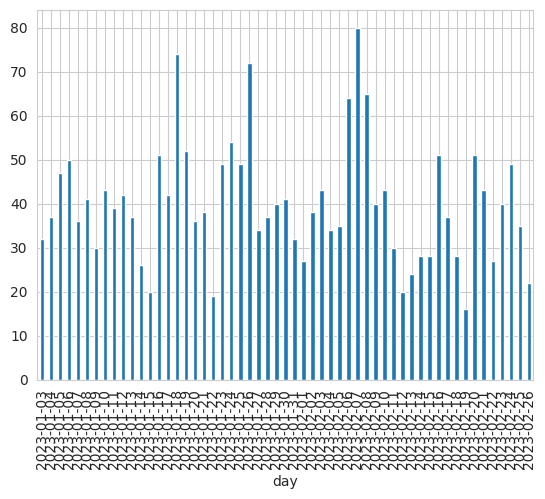

In [101]:
df['day'] = df['TEST_DATE'].dt.date
df_plot = df.groupby('day').count()['DL_Category_1']

df_plot.plot.bar()

<AxesSubplot:xlabel='day'>

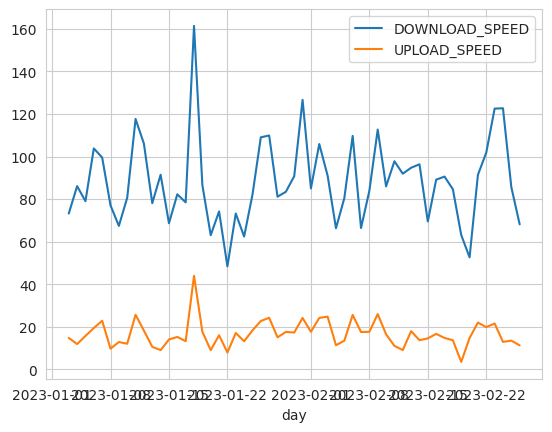

In [102]:
df_plot = df.groupby('day').mean()[['DOWNLOAD_SPEED', 'UPLOAD_SPEED']]
df_plot.plot()

<AxesSubplot:title={'center':'DOWNLOAD_SPEED'}, xlabel='[DEVICE]'>

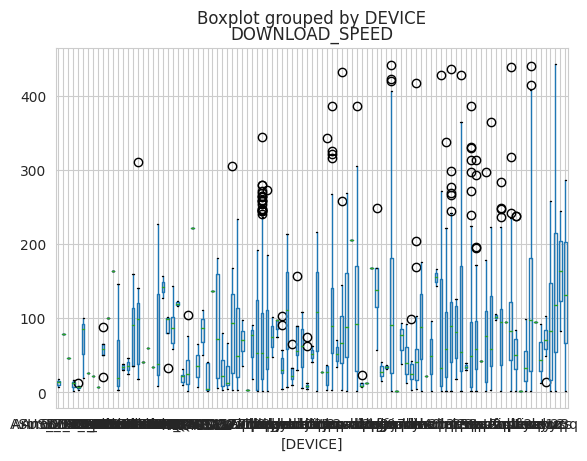

In [103]:
df.boxplot(column = ['DOWNLOAD_SPEED'], by = ['DEVICE'])

<AxesSubplot:title={'center':'UPLOAD_SPEED'}, xlabel='[DEVICE]'>

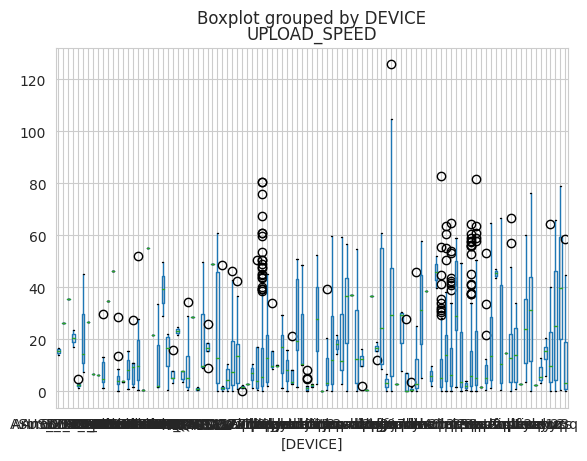

In [104]:
df.boxplot(column = ['UPLOAD_SPEED'], by = ['DEVICE'])

In [105]:
df['DEVICE'].nunique()

103

<AxesSubplot:title={'center':'DOWNLOAD_SPEED'}, xlabel='[DL_Category]'>

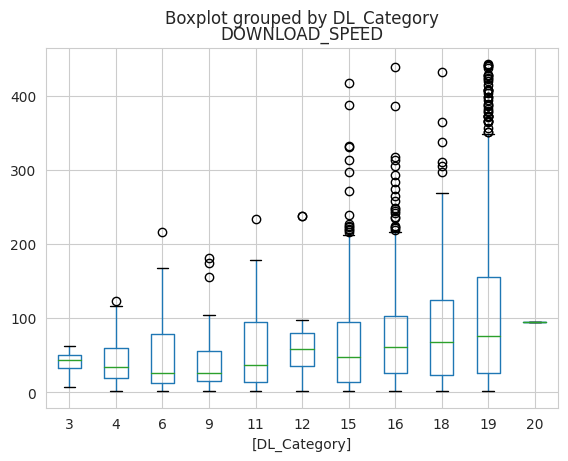

In [106]:
df.boxplot(column = ['DOWNLOAD_SPEED'], by = ['DL_Category'])

<AxesSubplot:title={'center':'UPLOAD_SPEED'}, xlabel='[DL_Category]'>

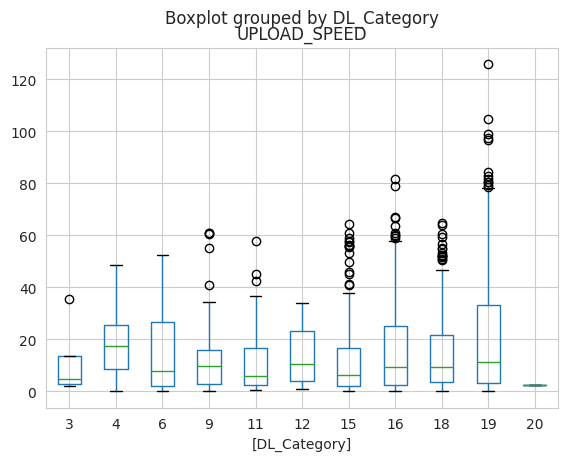

In [107]:
df.boxplot(column = ['UPLOAD_SPEED'], by = ['DL_Category'])

In [128]:
df_plot = df[['DOWNLOAD_SPEED', 'DBM_A', 'DL_Category', 'CA']]
#df_plot['DBM_A'] = df_plot['DBM_A'].abs()
df_plot = df_plot[df_plot['DBM_A'] < 500]

<AxesSubplot:xlabel='DBM_A', ylabel='DOWNLOAD_SPEED'>

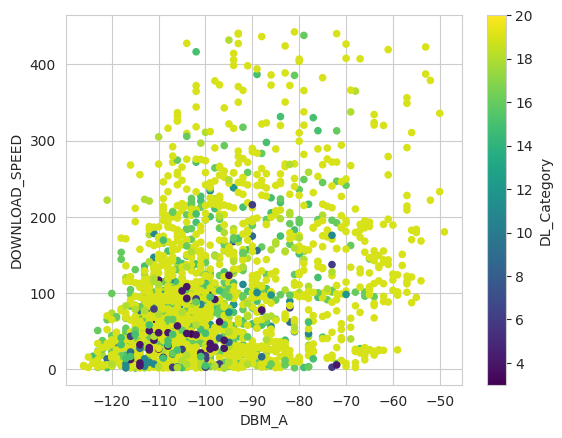

In [132]:
df_plot.plot.scatter(x = 'DBM_A', y = 'DOWNLOAD_SPEED', c = 'DL_Category', colormap='viridis')

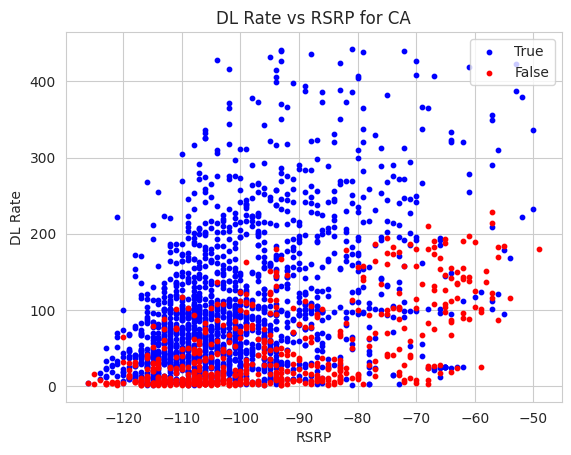

In [130]:
#df_plot.plot.scatter(x = 'RSRP_A', y = 'DBM_A', c = 'CA', colormap='viridis')

df_1 = df_plot[df_plot['CA'] == True].dropna()
df_2 = df_plot[df_plot['CA'] == False].dropna()

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(df_1['DBM_A'], df_1['DOWNLOAD_SPEED'], s=10, color='b', label = 'True')
ax1.scatter(df_2['DBM_A'], df_2['DOWNLOAD_SPEED'], s=10, color='r', label = 'False')
plt.legend(loc='upper right')
plt.title('DL Rate vs RSRP for CA')
plt.xlabel('RSRP')
plt.ylabel('DL Rate')
plt.show()